# The Embedding Notebook 1
## John E. Inglesfield

This notebook (and more to follow) provides short computer programs to illustrate the embedding method, and to accompany the book *The Embedding Method for Electronic Structure* (ebook ISBN 978-0-7503-1042-0, print ISBN 978-0-7503-1043-7), published in the *Expanding Physics* ebook program by [IOP Publishing](http://iopscience.iop.org/books/iop-expanding-physics).
![cover](inglesfield_500px.gif)
The aim of the notebook is to explore the physics of the problems as well as how the embedding method works, by playing with the parameters. It can of course be used independently, but the problems and methods are described in detail in the book: the chapter, section, equation and figure numbering all refer to the book. Note that atomic units are used, with $e=\hbar=m_e=1$.

The following Python libraries are used: `SciPy`, `NumPy`, and `Matplotlib`. These all come in the Anaconda distribution, for example. The notebook also uses the following modules, which are in the repository: `my_function.py`, and `surface.py`.

## Chapter 2  The Variational Embedding Method

### 2.3  A first application
Here we find the bound states for the model surface potential,
![model surface](model_surf.png)
In this model (figure 2.1) the flat region to the right represents the vacuum, the flat region to the left the potential inside the solid, and the well an adsorbate potential. The wave-functions in region I, the potential well, are expanded in terms of the basis functions (2.30)
$$
\chi_n(z)=\begin{cases}\cos(n\pi z/D),&n=0,2,4 \ldots \\
\sin(n\pi z/D),&n=1,3,5\ldots,\end{cases} 
$$
First we input the parameters defining the potential, $v$, $w$ and $d$, the number of basis functions `n_max`, and $D$ (for the embedding method to work we should use $D\geq d$, preferably a little bit bigger). We also input the number of eigenvalues to be plotted, `N_eigenvalues`.  
**Remember** that with the potential shown above, the bound states have $E_i<0$; the positive eigenvalues are unphysical (but see section 2.6 and below for calculating the resonances).

In [1]:
v, w, d = -0.45, 0.5, 8 #in the book the values are -0.45, 0.5, 8 
n_max, D = 15, 12
N_eigenvalues=3
param=[n_max,v,w,d,D]
assert (N_eigenvalues<=n_max),"Number of eigenvalues requested > basis set size"

Using the Python functions in the module `my_function` we set up the embedded Hamiltonian $H_{mn}$ (2.26) and overlap matrix $O_{mn}$ (2.27) for this simple one-dimensional problem.

In [2]:
import my_function as myf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matrices=myf.matrix_construct(param)

After this point we can run the programs in any order we wish. First we calculate the eigenvalues as a function of the trial energy $E_0$ at which the embedding potential $\Sigma$ is evaluated (2.29), plotting `N_eigenvalues`.

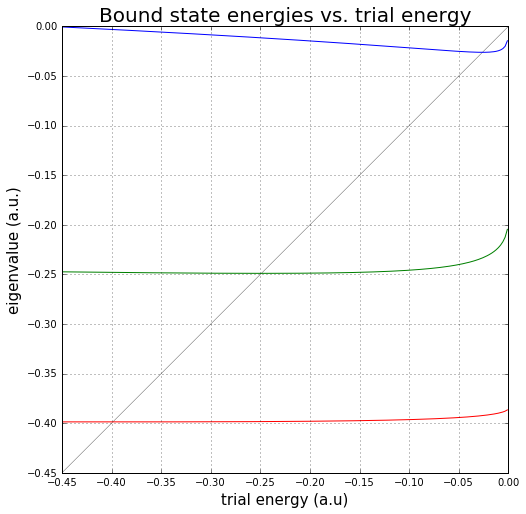

In [3]:
elist=np.linspace(v+0.001,-0.001,200)
eig=np.array([myf.hamiltonian(matrices,etry)[0:N_eigenvalues] for etry in elist])
# plotting routines
colour=['red','green','blue','cyan','magenta']
%matplotlib inline
plt.rcParams['figure.figsize']=8,8
plt.xlabel('trial energy (a.u)',fontsize=15)
plt.ylabel('eigenvalue (a.u.)',fontsize=15)
#plt.axes().set_aspect('auto')
plt.grid(True)
plt.plot([v,0.0],[v,0.0],color='black',lw=0.3)
for n in range(0,N_eigenvalues):
    plt.plot(elist,eig[:,n].real,color=colour[n%5])
plt.axhline(color='black')
plt.title('Bound state energies vs. trial energy',fontsize=20)

The thin line indicates $E=E_0$, and each eigenvalue minimum coincides with the intersection of this line with the corresponding $E(E_0)$ curve. Compare this with figure 2.2 and table 2.1.

### 2.5 Application to continuum states

We now calculate the surface density of states of the model surface potential, using the embedded Green function $G(\mathbf{r},\mathbf{r}';E)$. We use (2.43) to calculate $n_\textrm{I}(E)$, the density of states in region I (the square well) with the same potential and basis set parameters.  
For this calculation we input the energy range, between `en_start` and `en_end`, the number of energy points `number_en`, and the imaginary part of the energy $\eta$ (2.43), which we input as `eta`. The parameter `dos_range` gives the range of the $n_\textrm{I}$ ($y$) axis. 
The potential and basis set parameters remain the same as in the eigenvalue calculation above.

In [4]:
en_start, en_end, number_en, eta = -0.5, 1.0, 1000, 1.0e-5 
dos_range = 4.0

We now run the program, plotting the surface density of states as a function of energy.

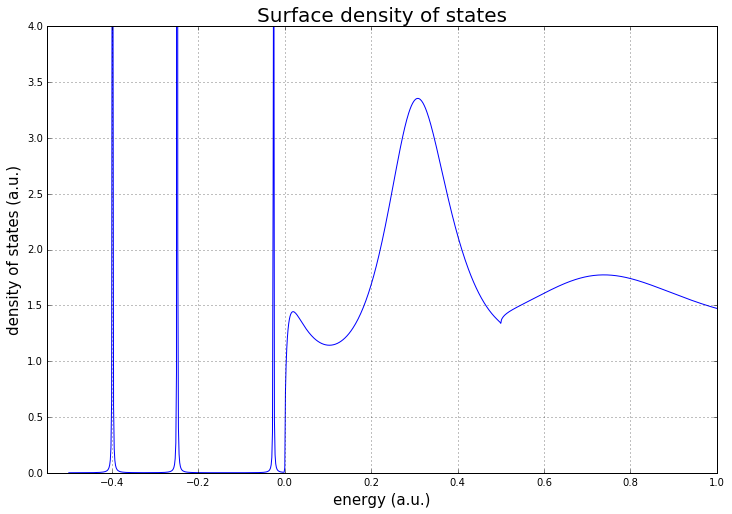

In [5]:
elist=np.linspace(en_start,en_end,number_en)
results=[]
for energy in elist:
    results.append([myf.green(matrices,energy,eta)])
# plotting routines
%matplotlib inline
plt.rcParams['figure.figsize']=12,8
plt.axis([en_start-0.05,en_end,0.0,dos_range])
plt.grid(True)
plt.xlabel('energy (a.u.)',fontsize=15)
plt.ylabel('density of states (a.u.)',fontsize=15)
plt.title('Surface density of states',fontsize=20)
plt.plot(elist,results)

We can compare the bound state energies with the eigenvalues calculated above. In the continuum we see two $E^{-\frac{1}{2}}$ singularities (in the limit that $\eta\rightarrow 0$), at $E=0$ above which electrons can travel freely into the solid, and at $E=w$ where electrons start to escape into the vacuum. For a discussion of these and other features in the surface density of states see section 2.5.

### 2.6 Resonances and complex eigenvalues
Many features in the density of states can be described in terms of resonances at complex energies, which can be calculated using embedding. For the resonance eigenvalues, given by $E_i=(\Re E_i, \Im E_i)$, $\Re E_i>0$ and $\Im E_i<0$, as in figure 2.8. Note that this program also gives the bound states, with $\Re E_i<0$ and $\Im E_i=0$.

In response to the prompt you should enter a trial complex energy, or `+n` and the trial complex energy if you want the n'th resonance added to the list, or `-` if you want to finish. At this point the program plots the resonance energies. Typical prompts and your response (remember to enter) are:  
`complex energy (or - or +) = ?
complex energy (or - or +) = ? +0.302 -0.126`.  
Or if you want the 3rd eigenvalue to be added to the list with the trial energy +0.426 -0.127,  
`complex energy (or - or +) = ? +3 +0.426 -0.127`  
or if you want to finish and get the list of resonances and the plot,  
`complex energy (or - or +) = ? -`  
Mistakes in input should mostly be captured by the exceptions, and the prompt will appear
`try again!` 

After your list of resonances has been printed, they are plotted in the complex $E$-plane.

complex energy (or - or +) = ? -0.4 0.0
    eigenvalues
  0 -0.398695  0.000000
  1 -0.247959  0.000000
  2 -0.003052  0.000000
  3  0.337925  0.000000
  4  0.786591  0.000000
  5  1.357764  0.000000
  6  2.064293  0.000000
  7  2.915350  0.000000
  8  3.916376  0.000000
  9  5.070182  0.000000
 10  6.378042  0.000000
 11  8.125728  0.000000
 12  9.970610  0.000000
 13 21.622162  0.000000
 14 27.267290  0.000000
complex energy (or - or +) = ? +0 -0.4 0.0
complex energy (or - or +) = ? +1 -0.25 0.0
complex energy (or - or +) = ? -0.01 0.0
    eigenvalues
  0 -0.389866  0.000000
  1 -0.222980  0.000000
  2 -0.024536  0.000000
  3  0.204869  0.000000
  4  0.601492  0.000000
  5  1.143632  0.000000
  6  1.829160  0.000000
  7  2.666050  0.000000
  8  3.658299  0.000000
  9  4.806906  0.000000
 10  6.111704  0.000000
 11  7.752041  0.000000
 12  9.586046  0.000000
 13 19.495702  0.000000
 14 25.467144  0.000000
complex energy (or - or +) = ? -0.025 0.0
    eigenvalues
  0 -0.392190  0.00000

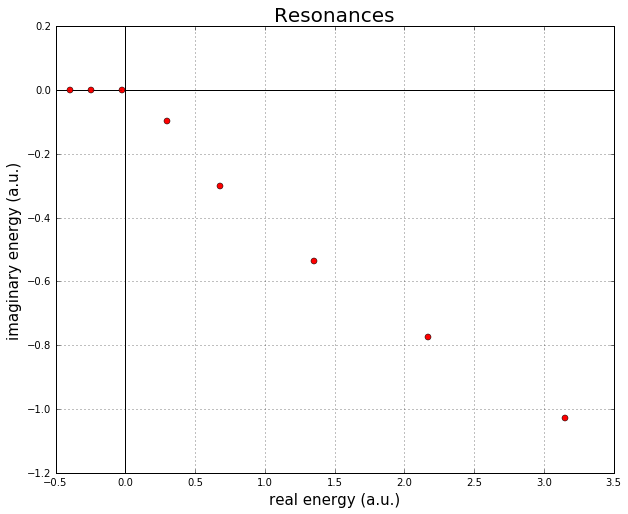

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize']=10,8
plt.grid(True)
plt.axhline(color='black')
plt.axvline(color='black')
plt.xlabel('real energy (a.u.)',fontsize=15)
plt.ylabel('imaginary energy (a.u.)',fontsize=15)
plt.title('Resonances',fontsize=20)
# resonances is a list of the resonances and their complex energies, plotted below.
resonances=[]
while True:
    comp_en=raw_input('complex energy (or - or +) = ? ')  
    comp_en=comp_en.split()
    if comp_en[0]=='-':
        break
    elif comp_en[0][0]=='+' and len(comp_en)==3:
        try:
            num_res=int(comp_en[0])
        except ValueError:
            print 'try again!'
            continue
        comp_en=complex(float(comp_en[1]),float(comp_en[2]))
        eig=myf.hamiltonian(matrices,comp_en)
        resonances.append(eig[num_res])
    else:
        try:
            comp_en=complex(float(comp_en[0]),float(comp_en[1]))
        except ValueError:
            print 'try again!'
            continue
        eig=myf.hamiltonian(matrices,comp_en)
        print '    eigenvalues'
        for num_res in range(0,len(eig)):
            print '%3d %9f %9f' % (num_res,eig[num_res].real,eig[num_res].imag)
print '   Resonances'
for num_res in range(0,len(resonances)):
    print '%9f %9f' % (resonances[num_res].real,resonances[num_res].imag)
    plt.plot (resonances[num_res].real,resonances[num_res].imag,'ro')


We can compare the resonance energies with the peaks in the surface density of states figure.

## Chapters 3 and 4 Embedding at surfaces

We can illustrate the properties of surface states, surface resonances, and image-induced states using the one-dimensional model potential introduced by Chulkov *et al*. (E.V. Chulkov, V.M. Silkin, and P.M. Echenique, [Surf. Sci. 
**437** 330-352 (1999))](http://www.sciencedirect.com/science/article/pii/S0039602899006688), which we use and describe explicitly in chapter 10. In this model the surface potential is given by (10.37),
$$
V(z)=\begin{cases}A_1\cos(2\pi z/a),&z\lt 0\\
-A_{10}-A_{20}+A_2\cos(\beta z),&0\lt z\lt z_1\\
-A_{10}+A_3\exp[-\alpha(z-z_1)],&z_1\lt z\lt z_\textrm{im}\\
-A_{10}+\left(\exp[-\lambda(z-z_\textrm{im})]-1\right)/4(z-z_\textrm{im}),&z\gt z_\textrm{im},
\end{cases}     
$$
with parameters $a,A_{10},A_1,A_{20},A_2,A_3,\alpha,\beta,\lambda,z_1,z_\textrm{im}.$ Here $a$ is the separation of the lattice planes, and the other parameters are found by fitting to measured surface state energies together with the requirement that $V(z)$ and its derivative should be continuous across the boundaries $z_1$ and $z_\textrm{im}$. Parameters $a,A_{10},A_1,A_2,\beta$ are listed for the following surfaces, Al(001), Cu(001) and Cu(111), in files `Al(001)`, `Cu(001)` and `Cu(111)`. The values are taken from table 15 in Chulkov *et al*., the lattice constant $a$ being given in a.u., $A_{10},A_1$ and $A_2$ in eV, and $\beta$ as an inverse a.u. of length.

In response to the prompt we enter the name of the required file of coefficients. The program then calculates and plots the potential as a function of $z$, the coordinate perpendicular to the surface.

File for calculation?  Cu(111)
{'beta': 2.9416, 'a_lat': 3.94, 'a_10': -11.895, 'a_2': 4.3279, 'a_1': 5.14}


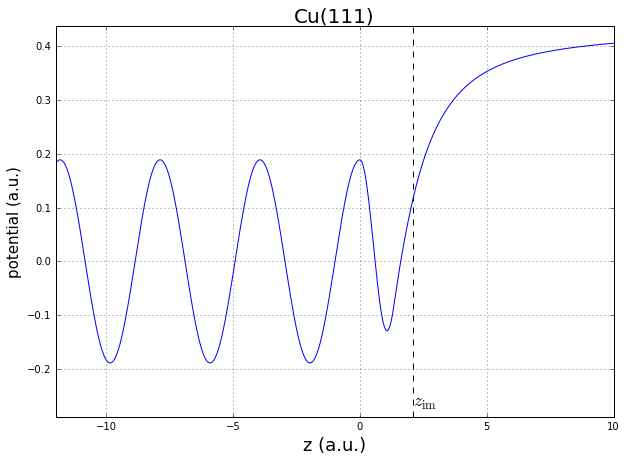

In [8]:
import surface as surf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
file_name=raw_input('File for calculation?  ')
infile=open(file_name,'r')
coeff={}
for line in infile:
    words=line.split()
    label=words[0]
    value=words[1]
    coeff[label]=float(value)
print coeff
# Plot potential. Range of plot can be altered in zlist.
param_pot=[coeff['a_lat'],coeff['a_10'],coeff['a_1'],coeff['a_2'],coeff['beta']]
vacuum_zero, amplitude, z_im=surf.pot_param(param_pot)
zlist=np.linspace(-12.0,10.0,400)
potential=np.array([surf.potential(z) for z in zlist])
plt.rcParams['figure.figsize']=10,7
plt.axis([-12.0,10.0,-amplitude-0.1,vacuum_zero])
plt.grid(True)
plt.xlabel('z (a.u.)',fontsize=18)
plt.ylabel('potential (a.u.)',fontsize=15)
plt.axvline(x=z_im,color='black',ls='dashed',lw=1)
plt.text(z_im,-amplitude-0.08,'$z_\mathrm{im}$',fontsize=18)
plt.title(file_name,fontsize=20)
plt.plot(zlist,potential)

The potential is plotted in a.u., with the average bulk potential as the zero, and the top of the plot is the asymptotic vacuum zero. $z=0$ corresponds to the position of the top layer of atoms, and $z_\textrm{im}$, from which the asymptotic image potential is measured, is shown on the figure by the vertical dashed line.

Next we calculate the surface density of states $n_\textrm{s}(E)$ with this potential. First we specify region I relative to the potential, by specifying its origin `z_orig`, and its width `d`. The left- and right-hand boundaries of region I are given by $z_\textrm{b}\equiv$ `z_left` and $z_\textrm{C}\equiv$ `z_right` (figure 10.5), with  
`z_left = z_orig - d/2` and `z_right = z_orig + d/2`  
(these are constructed and used by the function `matrix_construct` within the `surface` module).
The basis functions for expanding the Green function in region I are the same as above (2.30), and we specify $D$ and the number of basis functions by `D` and `n_max`. 

In [9]:
z_orig, d = 0.0, 10.0 
n_max, D = 15, 12.0 # D should be >= d

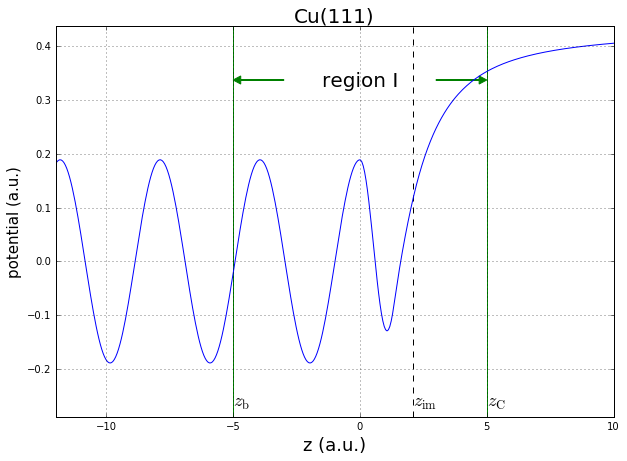

In [10]:
z_left=z_orig-d/2
z_right=z_orig+d/2
plt.rcParams['figure.figsize']=10,7
plt.axis([-12.0,10.0,-amplitude-0.1,vacuum_zero])
plt.grid(True)
plt.xlabel('z (a.u.)',fontsize=18)
plt.ylabel('potential (a.u.)',fontsize=15)
plt.axvline(x=z_im,color='black',ls='dashed',lw=1)
plt.axvline(x=z_left,color='green',lw=1)
plt.axvline(x=z_right,color='green',lw=1)
plt.text(z_im,-amplitude-0.08,'$z_\mathrm{im}$',fontsize=18)
plt.text(z_left,-amplitude-0.08,'$z_\mathrm{b}$',fontsize=18)
plt.text(z_right,-amplitude-0.08,'$z_\mathrm{C}$',fontsize=18)
plt.text(z_orig,vacuum_zero-0.1,'region I',fontsize=20,ha='center',va='center')
plt.arrow(z_left+2,vacuum_zero-0.1,-2,0,head_width=0.015,head_length=0.3,length_includes_head=True,color='green')
plt.arrow(z_right-2,vacuum_zero-0.1,2,0,head_width=0.015,head_length=0.3,length_includes_head=True,color='green')
plt.title(file_name,fontsize=20)
plt.plot(zlist,potential)

We also specify the energy range as before by `en_start`, `en_end`, with the number of energy points `number_en`, and the imaginary (broadening) energy `eta`. Typically we would choose `en_start` just below the bottom of the bulk continuum, $E\approx 0$ and `en_end` above the vacuum zero. If we want to study the image states and resonances in more detail we concentrate on the region around the vacuum zero.  
The parameter `dos_range` specifies the range of the $n_\textrm{s}$ ($y$) axis - we choose a smaller value to look at features in image resonances, for example.

In [11]:
en_start, en_end, number_en, eta = 0.39, 0.45, 1000, 1.0e-5 # these can all be varied
dos_range=20.0

Following section 10.4.1, at $z_\textrm{b}$ we add the bulk embedding potential $\Sigma_\textrm{b}(E)$, and at $z_\textrm{C}$ the Coulomb embedding potential, to the Hamiltonian for region I. **Note** that this means that $z_\textrm{C}$ must lie sufficiently beyond $z_\textrm{im}$ that we can use
$$
V(z)\approx E_\textrm{vac}-\frac{1}{4(z-z_\textrm{im})},\qquad z>z_\textrm{C},
$$
where $E_\textrm{vac}$ is the vacuum zero (3.12).  
$\Sigma_\textrm{b}(E)$ is constructed using the method described in section 10.4.1, based on the Bloch solutions of the Schrödinger equation, and $\Sigma_\textrm{C}(E)$ is found from the outgoing Coulomb wave-function $H^{-}_0$ as described in section 3.1.4.

In the next cell we run the surface density of states program, and plot the results (this may take a little time - be patient till the figure appears!).

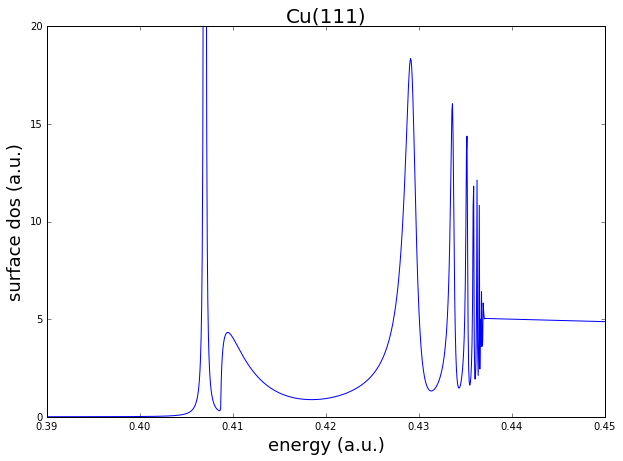

In [12]:
param_run=[n_max,z_orig,d,D]
results=[]
matrices=surf.matrix_construct(param_run)
elist=np.linspace(en_start,en_end,number_en)
for energy in elist:
    results.append([surf.green(matrices,energy,eta)])
plt.xlabel('energy (a.u.)',fontsize=18)
plt.ylabel('surface dos (a.u.)',fontsize=18)
plt.axis([en_start,en_end,0,dos_range])
plt.plot(elist,results)
plt.title(file_name,fontsize=20)

The surface densities of states in these one-dimensional calculations correspond to $\mathbf{k}_\|=0$ in a a three-dimensional calculation ($\bar{\Gamma}$ in the surface Brillouin zone). Despite the simplicity of the model, there is some interesting physics in these results!
#### Al(001)  
The surface density of states given by this one-dimensional model potential is quite close to the results of a full-potential embedded calculation for Al(001) - compare the calculated $n_\textrm{s}(E)$ with figure 3.12. It shows a (Shockley) surface state towards the bottom of the s-p band gap.  
Just below the vacuum zero at $E=0.577$ a.u. we see a series of *image resonances*.  These are electron states which are trapped by the image potential, but as their energy overlaps with the bulk continuum they can leak from outside the surface into the bulk (section 4.2.1). Their finite lifetime gives the states a width, but they become sharper and sharper as they approach the vacuum threshold (use a small value of $\eta$ to see this). Figure 4.5 shows a full-potential embedding calculation of the local density of states integrated through the "near-surface region" and it shows the same image resonances. A remarkable feature of image resonances and image-induced surface states is the way that the local density of states merges with the continuum above threshold: if you smear out the image resonances in this calculation by broadening with $\eta$, you see that the surface density of states is continuous across the vacuum zero. This remarkable threshold behaviour, characteristic of the Coulomb potential, is discussed in section 4.2.1.  
Note that it is the Coulomb embedding potential $\Sigma_\textrm{C}$, describing the asymptotic image potential, which ensures the correct description of image-potential-induced states and resonances.
#### Cu(001)
The first point to make about the one-dimensional Chulkov model potentials for Cu(001), and similarly for Cu(111), is that it is only designed to describe states around the s-p band gap and does not describe the Cu d-bands (section 10.4.1). The Fermi energy $E_\textrm{F}$ lies *below* the s-p gap at $\bar{\Gamma}$ in the case of Cu(001).  
This calculation shows no Shockley surface state in the s-p gap of Cu(001). There is, however, a large peak in $n_\textrm{s}(E)$ just below the bottom of the gap, at $E\approx 0.3$ a.u., which is usually interpreted as a surface resonance. However below the vacuum threshold at $E=0.422$ a.u. there is an infinite series of *image states*. Unlike in the case of Al(001) these are surface states rather than resonances, as they lie in the bulk band gap. If we choose an energy range just around the vacuum zero, the results show very clearly the threshold behaviour which we found for the Al(001) image resonances - $n_\textrm{s}(E)$ below the vacuum threshold merges continuously with the density of states above threshold, especially if we smear it out with an increased $\eta$. The same behaviour is shown in figure 4.4 of the book, giving the density of states in the near-surface region for Ni(001) (see also M. Nekovee and J.E. Inglesfield, 
[Europhys. Lett. **19** 535-540 (1992)](http://stacks.iop.org/0295-5075/19/i=6/a=016)).
#### Cu(111)
The model for the Cu(111) surface shows all the features we have found for Al(001) and Cu(001) - a Shockley surface state, an image state and image resonances. When we run the program we see the Shockley surface state near the bottom of the s-p gap; notice that there is no peak in the continuum just below the band edge, as we find with Cu(001). This band edge behaviour is discussed in section 2.5 of the book, and is illustrated in figure 2.5, using the square well model of the surface (we can explore this behaviour by playing with the parameters of the square well model in 2.5 above). This surface state, which is just below $E_\textrm{F}$ at $\mathbf{k}_\|$, like the corresponding state on Ag(111), has been used in studies of two-dimensional quantum confinement by surface structures (section 5.3).  
In this case there is one image state, just below the band edge at $E= 0.409$ a.u., with an infinite series of image resonances converging to the vacuum level at $E=0.437$ a.u. An interesting feature is the peak at the band edge, not a separate image resonance but associated with the image state barely pulled off the band edge (compare this with figure 2.5). 